# Clasificación de Texto con Modelo Gladys

## Invocación del modelo

In [1]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification, TrainingArguments, Trainer

d:\Pruebas IA\TFM\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
model = AutoModelForSequenceClassification.from_pretrained('./Modelo_Contextual_BERT_Gladys_V1')

In [3]:
tokenizer = AutoTokenizer.from_pretrained('./Modelo_Contextual_BERT_Gladys_V1')

In [4]:
print(tokenizer)

BertTokenizerFast(name_or_path='./Modelo_Contextual_BERT_Gladys_V1', vocab_size=31002, model_max_length=512, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'}, clean_up_tokenization_spaces=False, added_tokens_decoder={
	0: AddedToken("[MASK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	1: AddedToken("[PAD]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	3: AddedToken("[UNK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	4: AddedToken("[CLS]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	5: AddedToken("[SEP]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
}
)


## Llamdo a la fuente de datos

In [5]:
import pandas as pd

In [6]:
data = pd.read_excel('Data_Limpia_Reseñas_tfm_filtrada.xlsx')

In [7]:
data.head(5)

,Unnamed: 0,Respuesta,Pregunta
0,0,la docente tizne un amplio conocimiento en el ...,¿Qué aspectos positivos destaca el profesor?
1,1,en concretar tiempo de revisión documental,¿En cuales aspectos considera que debería mejo...
2,2,comunicación,¿En cuales aspectos considera que debería mejo...
3,3,prestar mas atención a sus estudiante cuando r...,¿En cuales aspectos considera que debería mejo...
4,4,responsable y comprometida con la enseñanza,¿Qué aspectos positivos destaca el profesor?


## Conversion a Datasets

In [8]:
from datasets import Dataset, DatasetDict

In [9]:
dataset_completo = Dataset.from_pandas(data)

In [10]:
print(dataset_completo)

Dataset({
    features: ['Unnamed: 0', 'Respuesta', 'Pregunta'],
    num_rows: 177710
})


In [12]:
index_data = dataset_completo["Unnamed: 0"]

## Tokenizado del dataset

In [14]:
dataset_completo.column_names

['Unnamed: 0', 'Respuesta', 'Pregunta']

In [15]:
MAX_LEN = 128

def tokenizar(Data_ejemplo):
    return tokenizer(Data_ejemplo['Pregunta'], Data_ejemplo['Respuesta'], max_length = MAX_LEN, truncation=True, padding='max_length', return_tensors="pt")

In [16]:
dataset_tokenizado_final = dataset_completo.map(tokenizar, batched= True)

Map: 100%|██████████| 177710/177710 [00:10<00:00, 17740.87 examples/s]


In [20]:
dataset_tokenizado_final.column_names

['Unnamed: 0',
 'Respuesta',
 'Pregunta',
 'input_ids',
 'token_type_ids',
 'attention_mask']

In [18]:
dataset_tokenizado_final['input_ids']

[[4,
  1067,
  1281,
  4909,
  12848,
  10446,
  1040,
  5533,
  1064,
  5,
  1030,
  13900,
  1248,
  24915,
  30931,
  1049,
  7197,
  5040,
  1036,
  1040,
  23794,
  1323,
  1008,
  3058,
  6014,
  1042,
  21131,
  1476,
  5,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1],
 [4,
  1067,
  1187,
  3556,
  4909,
  3235,
  1038,
  2955,
  4123,
  1040,
  5533,
  1064,
  5,
  1036,
  14064,
  30936,
  1577,
  1008,
  6580,
  13648,
  5,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  

## Realización de predicciones

In [24]:
dataset_tokenizado_final.column_names

['Unnamed: 0',
 'Respuesta',
 'Pregunta',
 'input_ids',
 'token_type_ids',
 'attention_mask']

In [25]:
dataset_para_prediccion = dataset_tokenizado_final.remove_columns(['Unnamed: 0', 'Respuesta', 'Pregunta'])

In [21]:
import torch
import numpy as np

In [22]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [23]:
def predict_batched(batch):
    batch = {k : torch.tensor(v).to(device) for k, v in batch.items()}

    with torch.no_grad():
        outputs = model(**batch)

    logits = outputs.logits

    predictions = torch.argmax(logits, dim=1).cpu().numpy()

    return {'predictions': predictions}


In [26]:
datset_con_predicciones = dataset_para_prediccion.map(predict_batched, batched= True, batch_size=8)

Map: 100%|██████████| 177710/177710 [3:28:29<00:00, 14.21 examples/s]  


In [29]:
Predicciones = datset_con_predicciones['predictions']

In [30]:
label_map = {0: 'Negativo', 1: 'Positivo', 2: 'Neutral'}
interpreted_predictions = [label_map[p] for p in Predicciones]

In [32]:
interpreted_predictions

['Neutral',
 'Negativo',
 'Negativo',
 'Negativo',
 'Neutral',
 'Neutral',
 'Neutral',
 'Neutral',
 'Neutral',
 'Negativo',
 'Neutral',
 'Neutral',
 'Negativo',
 'Neutral',
 'Negativo',
 'Neutral',
 'Neutral',
 'Neutral',
 'Neutral',
 'Neutral',
 'Neutral',
 'Negativo',
 'Positivo',
 'Neutral',
 'Negativo',
 'Neutral',
 'Neutral',
 'Neutral',
 'Neutral',
 'Neutral',
 'Neutral',
 'Neutral',
 'Negativo',
 'Neutral',
 'Neutral',
 'Neutral',
 'Neutral',
 'Neutral',
 'Neutral',
 'Neutral',
 'Neutral',
 'Negativo',
 'Neutral',
 'Neutral',
 'Negativo',
 'Negativo',
 'Neutral',
 'Neutral',
 'Negativo',
 'Neutral',
 'Neutral',
 'Neutral',
 'Neutral',
 'Neutral',
 'Neutral',
 'Negativo',
 'Neutral',
 'Neutral',
 'Neutral',
 'Neutral',
 'Neutral',
 'Neutral',
 'Neutral',
 'Neutral',
 'Neutral',
 'Negativo',
 'Negativo',
 'Neutral',
 'Negativo',
 'Negativo',
 'Positivo',
 'Neutral',
 'Neutral',
 'Neutral',
 'Neutral',
 'Neutral',
 'Negativo',
 'Neutral',
 'Neutral',
 'Neutral',
 'Negativo',
 'Neut

In [33]:
import pandas as pd

In [34]:
pred_series = pd.Series(Predicciones)

<Axes: ylabel='count'>

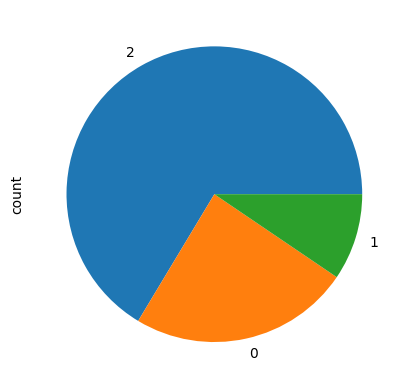

In [38]:
pred_series.value_counts().plot(kind='pie')

In [39]:
pred_series.to_excel('./etiquetas_finales.xlsx')

In [43]:
dataset_completo_final = dataset_completo.add_column(name="predicciones", column=interpreted_predictions)

In [49]:
dataset_completo_final[1]

{'Unnamed: 0': 1,
 'Respuesta': 'en concretar tiempo de revisión documental',
 'Pregunta': '¿En cuales aspectos considera que debería mejorar el profesor?',
 'predicciones': 'Negativo'}

## Merge de información 